<a href="https://colab.research.google.com/github/plaf2000/colab-hci/blob/main/hci_statistical_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import scipy
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
# TODO: Read data
df = pd.read_csv('/content/hci_user_study_raw.csv')  
df['sus_score_A'], df['sus_score_B'] = pd.to_numeric(df['sus_score_A']), pd.to_numeric(df['sus_score_B'])
df

,user_id,user_age,field_of_study,coding_experience,coding_languages,coding_frequency,sus_score_A,sus_score_B,personal_score_A,personal_score_B,preferred_interface,clicks_A1,clicks_A2,clicks_B1,clicks_B2,time_A1,time_A2,time_B1,time_B2
0,2,22,Computer Science,< 6 years,"Java, Python",2-3 times a week,90.0,75.0,NaN,NaN,A,34,40,65,51,107,147,144,101
1,3,22,Computer Science,< 6 years,"Java, C, Rust, Haskell, Ocaml",Daily,82.5,82.5,NaN,NaN,B,41,33,55,48,99,84,95,91
2,4,20,Computer Science,> 6 years,"C, Rust, Haskell, Ocaml",Daily,70.0,75.0,NaN,NaN,B,42,26,55,41,109,73,97,74
3,5,20,Computer Science,< 6 years,Java,Daily,62.5,65.0,NaN,NaN,A,94,59,59,64,113,91,89,97
4,6,58,Machine Engineering,No,No,No,42.5,60.0,NaN,NaN,B,125,47,83,105,342,130,134,149
5,7,55,Childcare,No,No,No,62.5,70.0,NaN,NaN,A,64,44,124,63,185,112,394,178
6,8,20,Carpeneter EFZ,No,No,No,75.0,75.0,NaN,NaN,B,50,38,84,65,174,76,144,84
7,9,22,"Robotics, System and Control",< 3 years,"Python, Matlab, Fortran",2-3 times a week,77.5,70.0,NaN,NaN,B,117,134,88,73,438,258,158,109
8,10,22,Biology,< 1 year,Python,Less (or never),95.0,87.5,NaN,NaN,A,52,36,86,65,98,76,155,101
9,11,55,Chief Finance Officer,< 3 years,"Java, Python",Less (or never),100.0,100.0,NaN,NaN,A,74,79,71,70,174,161,177,173


# Demographic visualization

(array([4., 9., 0., 0., 0., 0., 0., 0., 0., 3.]),
 array([18., 22., 26., 30., 34., 38., 42., 46., 50., 54., 58.]),
 <a list of 10 Patch objects>)

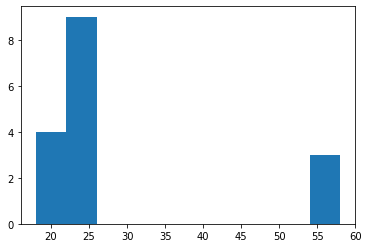

In [ ]:
# Age and field of study
plt.hist(df['user_age'])
# Coding experience




([<matplotlib.patches.Wedge at 0x7f7ecb212490>,
 [Text(0.42095177560159885, 1.0162674857624154, '< 6 years'),
  Text(-1.1, 1.3471114790620887e-16, 'No'),
  Text(-0.21459935421774154, -1.0788638084435533, '< 3 years'),
  Text(0.7778174593052022, -0.7778174593052025, '< 1 year'),
  Text(1.0788638084435533, -0.21459935421774162, '> 6 years')],
 [Text(0.22961005941905388, 0.5543277195067721, '37.5%'),
  Text(-0.6, 7.347880794884119e-17, '25.0%'),
  Text(-0.1170541932096772, -0.5884711682419381, '18.8%'),
  Text(0.4242640687119284, -0.4242640687119286, '12.5%'),
  Text(0.5884711682419381, -0.11705419320967722, '6.2%')])

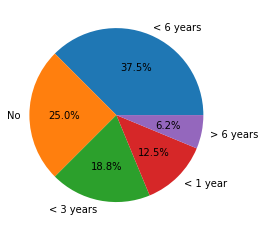

In [ ]:
plt.pie(df['coding_experience'].value_counts(), labels=df['coding_experience'].value_counts().index, autopct='%1.1f%%')
#coding = df.rename(columns = {'coding_experience':'Coding Experience', 'coding_languages':'Coding Languages', 'coding_frequency':'Coding Frequency'})[['Coding Experience', 'Coding Languages', 'Coding Frequency']]
#coding.plot.pie(subplots=True)

# Data visualization

([<matplotlib.patches.Wedge at 0x7f7ecb2b5eb0>,
 [Text(-0.21459935421774104, 1.0788638084435536, 'A'),
  Text(0.21459935421774115, -1.0788638084435536, 'B')],
 [Text(-0.11705419320967692, 0.5884711682419382, '56.2%'),
  Text(0.11705419320967697, -0.5884711682419382, '43.8%')])

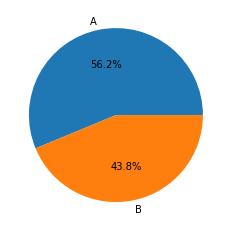

In [ ]:
# Preferred interface
#df.rename(columns = {'preferred_interface':'Preferred Interface'}).plot.pie(y='Preferred Interface', figsize=(5,5))
plt.pie(df['preferred_interface'].value_counts(), labels=df['preferred_interface'].value_counts().index, autopct='%1.1f%%')
#coding = df.rename(columns = {'coding_experience':'Coding Experience', 'coding_languages':'Coding Languages', 'coding_frequency':'Coding Frequency'})[['Coding Experience', 'Coding Languages', 'Coding Frequency']]
#coding.plot.pie(subplots=True)

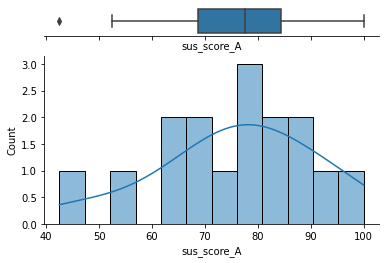

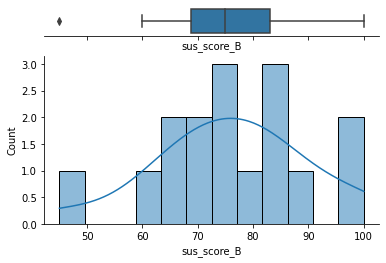

In [ ]:
# Sus score
x = df['sus_score_A']
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(x=x, ax=ax_box)
sns.histplot(x=x, bins=12, kde=True, stat='count', ax=ax_hist)

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

x = df['sus_score_B']
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(x=x, ax=ax_box)
sns.histplot(x=x, bins=12, kde=True, stat='count', ax=ax_hist)

ax_box.set(yticks=[])
sns.despine(ax=ax_hist)
sns.despine(ax=ax_box, left=True)

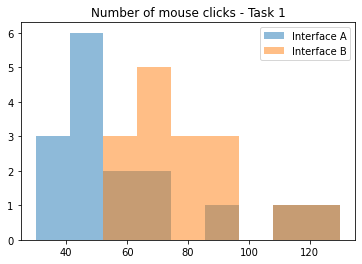

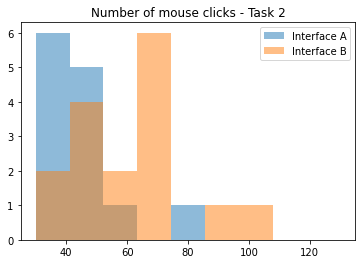

In [ ]:
# Number of clicks
bins = np.linspace(30, 130, 10) # Range of clicks
# Task 1
x = df['clicks_A1']
y = df['clicks_B1']
plt.hist(x, bins, alpha=0.5, label='Interface A')
plt.hist(y, bins, alpha=0.5, label='Interface B')
plt.legend(loc='upper right')
plt.title('Number of mouse clicks - Task 1')
plt.show()
# Task 2
x = df['clicks_A2']
y = df['clicks_B2']
plt.hist(x, bins, alpha=0.5, label='Interface A')
plt.hist(y, bins, alpha=0.5, label='Interface B')
plt.legend(loc='upper right')
plt.title('Number of mouse clicks - Task 2')
plt.show()

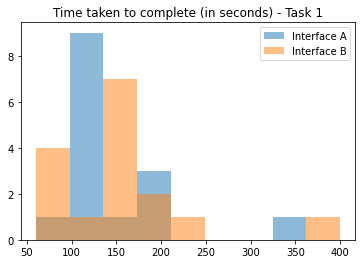

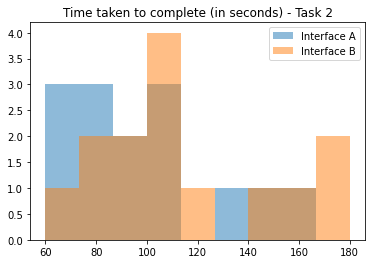

In [ ]:
# Time 
bins = np.linspace(60, 400, 10) # Range of time
# Task 1
x = df['time_A1']
y = df['time_B1']
plt.hist(x, bins, alpha=0.5, label='Interface A')
plt.hist(y, bins, alpha=0.5, label='Interface B')
plt.legend(loc='upper right')
plt.title('Time taken to complete (in seconds) - Task 1')
plt.show()
bins = np.linspace(60, 180, 10) # Range of time
# Task 2
x = df['time_A2']
y = df['time_B2']
plt.hist(x, bins, alpha=0.5, label='Interface A')
plt.hist(y, bins, alpha=0.5, label='Interface B')
plt.legend(loc='upper right')
plt.title('Time taken to complete (in seconds) - Task 2')
plt.show()

# Statistical Analysis

In [ ]:
# [For interval and ratio data] Are the samples drawn from a normal distribution?
# Shapiro-Wilk test
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html
scipy.stats.shapiro(x)

In [ ]:
# [For interval and ratio data] Are the samples drawn from a population with equal variances (i.e., homoscedasticity)
# Levene's test
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html
scipy.stats.levene(x, proportiontocut=0.05)

## SUS test score

In [ ]:
# Check for normality
x = df['sus_score_A']
print('a Shapiro-Wilk test on SUS test score for interface A has a p-value of: {}'.format(scipy.stats.shapiro(x).pvalue))
y = df['sus_score_B']
print('a Shapiro-Wilk test on SUS test score for interface B has a p-value of: {}'.format(scipy.stats.shapiro(y).pvalue))

a Shapiro-Wilk test on SUS test score for interface A has a p-value of: 0.8736745119094849
a Shapiro-Wilk test on SUS test score for interface B has a p-value of: 0.9197377562522888


ValueError: ignored